In [1]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. 
# This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

data80164


In [2]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. 
# All changes under this directory will be kept even after reset. 
# Please clean unnecessary files in time to speed up environment loading. 
!ls /home/aistudio/work

data  ocrnet_check  result


In [3]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, 
# you need to use the persistence path as the following: 
!mkdir /home/aistudio/external-libraries
!pip install beautifulsoup4 -t /home/aistudio/external-libraries

mkdir: 无法创建目录"/home/aistudio/external-libraries": 文件已存在
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 97 kB 7.7 MB/s             
You should consider upgrading via the '/opt/conda/envs/python35-paddle120-env/bin/python -m pip install --upgrade pip' command.


In [4]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可: 
# Also add the following code, 
# so that every time the environment (kernel) starts, 
# just run the following code: 
import sys 
sys.path.append('/home/aistudio/external-libraries')

In [ ]:
!tree

.
├── data
│   └── data80164
│       ├── img_testA
│       │   ├── 10000.jpg
│       │   ├── 1000.jpg
│       │   ├── 1003.jpg
│       │   ├── 1006.jpg
│       │   ├── 1008.jpg
│       │   ├── 1009.jpg
│       │   ├── 1013.jpg
│       │   ├── 1015.jpg
│       │   ├── 1016.jpg
│       │   ├── 1018.jpg
│       │   ├── 1020.jpg
│       │   ├── 1021.jpg
│       │   ├── 1022.jpg
│       │   ├── 1026.jpg
│       │   ├── 1027.jpg
│       │   ├── 1029.jpg
│       │   ├── 1030.jpg
│       │   ├── 1031.jpg
│       │   ├── 1034.jpg
│       │   ├── 1035.jpg
│       │   ├── 1037.jpg
│       │   ├── 1038.jpg
│       │   ├── 1040.jpg
│       │   ├── 1042.jpg
│       │   ├── 1043.jpg
│       │   ├── 1044.jpg
│       │   ├── 1046.jpg
│       │   ├── 1047.jpg
│       │   ├── 1048.jpg
│       │   ├── 104.jpg
│       │   ├── 1050.jpg
│       │   ├── 1052.jpg
│       │   ├── 1055.jpg
│       │   ├── 1056.jpg
│       │   ├── 105.jpg
│       │   ├── 1060.jpg
│       │   ├── 1061.jpg
│       │   ├── 1063.jpg


In [ ]:
!unzip -q data/data80164/train_and_label.zip -d data/data80164
!unzip -q data/data80164/img_test.zip -d data/data80164
!tree data/data80164 -d

In [ ]:
!ls "./data/data80164/img_train/"

In [ ]:
!ls "./data/data80164/lab_train/"

In [9]:
import cv2
from PIL import Image
import numpy as np

img1_path = "./data/data80164/img_train/T000000.jpg"
img1 = cv2.imread(img1_path)
img1 = img1.transpose((2, 1, 0))  # 转换为H,W,C
# 打印形状
print('img1_shape:', img1.shape)
print('img1[:10, 0, 0]:', img1[:10, 0, 0])




img1_shape: (3, 256, 256)
img1[:10, 0, 0]: [0 0 0]


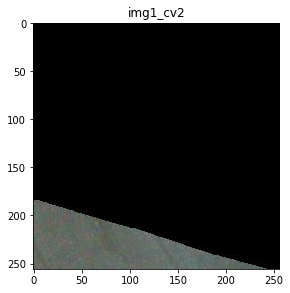

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# 显示图像
def show_img(img):
    cv2.normalize(img, img, 0, 255, cv2.NORM_MINMAX)  # 归一化到0-255
    img += 50  # 增加亮度看起来方便点
    img[img > 255] = 255  # 避免超出255
    return img
img1_path = "./data/data80164/img_train/T000000.jpg"
img1 = cv2.imread(img1_path)
# 显示图像
plt.figure(figsize=(15, 10))
plt.subplot(231);
plt.imshow(img1);
plt.title('img1_cv2')  # cv2读取为BGR

plt.show()

In [ ]:
import os
import numpy as np
DATA_ROOT_DIR = '/home/aistudio/data/data80164'

def make_list():
    img_list = [img.split('.')[0] for img in os.listdir(os.path.join(DATA_ROOT_DIR, 'img_train'))]
    data_path_list = []
    for image_id in img_list:
        image_path = os.path.join(DATA_ROOT_DIR, 'img_train', f"{image_id}.jpg")
        label_path = os.path.join(DATA_ROOT_DIR, 'lab_train', f"{image_id}.png")
        data_path_list.append((image_path, label_path))
        if not os.path.exists(image_path) or not os.path.exists(label_path):
            print(f"invalid path {image_path}")
    
    np.random.seed(5)
    np.random.shuffle(data_path_list)
    total_len = len(data_path_list)
    train_data_len = int(total_len*0.95)
    train_data = data_path_list[0 : train_data_len]
    val_data = data_path_list[train_data_len : ]

    with open(os.path.join(DATA_ROOT_DIR, 'train_list.txt'), "w") as f:
        for image, label in train_data:
            f.write(f"{image} {label}\n")

    with open(os.path.join(DATA_ROOT_DIR, 'val_list.txt'), "w") as f:
        for image, label in val_data:
            f.write(f"{image} {label}\n")


if __name__ == '__main__':
    make_list()

In [ ]:
##下载安装paddlesegv2.1版本
!git clone -b release/2.1 https://gitee.com/paddlepaddle/PaddleSeg.git

In [1]:
## 模型训练
!python /home/aistudio/PaddleSeg/train.py --config /home/aistudio/PaddleSeg/configs/ocrnet/ocrnet_hrnetw48_remotesensing_256x256.yml --do_eval --use_vdl --save_interval 5000 --save_dir work/ocrnet_check/

2022-02-27 21:17:44 [INFO]	
------------Environment Information-------------
platform: Linux-4.4.0-150-generic-x86_64-with-debian-stretch-sid
Python: 3.7.4 (default, Aug 13 2019, 20:35:49) [GCC 7.3.0]
Paddle compiled with cuda: True
NVCC: Cuda compilation tools, release 10.1, V10.1.243
cudnn: 7.6
GPUs used: 1
CUDA_VISIBLE_DEVICES: None
GPU: ['GPU 0: Tesla V100-SXM2-32GB']
GCC: gcc (Ubuntu 7.5.0-3ubuntu1~16.04) 7.5.0
PaddlePaddle: 2.2.2
OpenCV: 4.1.1
------------------------------------------------
/home/aistudio/work/data/train_list.txt
mode train /home/aistudio/work/data/train_list.txt /home/aistudio/work/data
Total data for train : 63319
mode val /home/aistudio/work/data/val_list.txt /home/aistudio/work/data
Total data for val : 3333
/home/aistudio/work/data/train_list.txt
mode train /home/aistudio/work/data/train_list.txt /home/aistudio/work/data
Total data for train : 63319
/home/aistudio/work/data/train_list.txt
mode train /home/aistudio/work/data/train_list.txt /home/aistudio/wor

In [7]:
##模型的预测，遥感图像的预测结果存放在work/result/文件中
!python /home/aistudio/PaddleSeg/predict.py --config /home/aistudio/PaddleSeg/configs/ocrnet/ocrnet_hrnetw48_remotesensing_256x256.yml --model_path /home/aistudio/work/ocrnet_check/iter_105000/model.pdparams --image_path /home/aistudio/data/data80164/img_testA --save_dir /home/aistudio/work/result

mode val /home/aistudio/work/data/val_list.txt /home/aistudio/work/data
Total data for val : 3333
2022-02-27 22:24:30 [INFO]	
---------------Config Information---------------
batch_size: 24
iters: 150000
loss:
  coef:
  - 1
  - 0.4
  types:
  - type: CrossEntropyLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
model:
  backbone:
    align_corners: false
    pretrained: https://bj.bcebos.com/paddleseg/dygraph/hrnet_w48_ssld.tar.gz
    type: HRNet_W48
  backbone_indices:
  - -1
  pretrained: https://bj.bcebos.com/paddleseg/dygraph/ccf/fcn_hrnetw48_rs_256x256_160k/model.pdparams
  type: OCRNet
optimizer:
  momentum: 0.9
  type: sgd
  weight_decay: 4.0e-05
train_dataset:
  mode: train
  negetive_ratio: 0
  train_dataset_root: /home/aistudio/work/data
  transforms:
  - max_scale_factor: 1.5
    min_scale_factor: 0.75
    scale_step_size: 0.25
    type: ResizeStepScaling
  - type: RandomHorizontalFlip
  - type: RandomVerticalFlip
  - max_rotation: 30


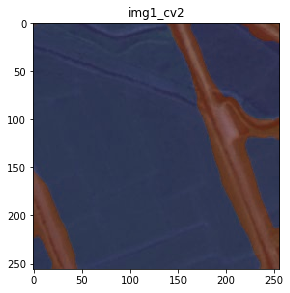

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# 显示图像
def show_img(img):
    cv2.normalize(img, img, 0, 255, cv2.NORM_MINMAX)  # 归一化到0-255
    img += 50  # 增加亮度看起来方便点
    img[img > 255] = 255  # 避免超出255
    return img
img1_path = "./work/result/added_prediction/1000.jpg"
img1 = cv2.imread(img1_path)
# 显示图像
plt.figure(figsize=(15, 10))
plt.subplot(231);
plt.imshow(img1);
plt.title('img1_cv2')  # cv2读取为BGR

plt.show()

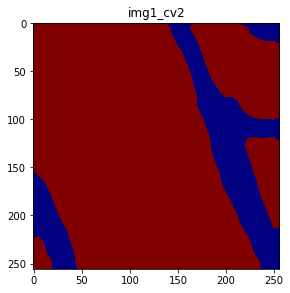

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

# 显示图像
def show_img(img):
    cv2.normalize(img, img, 0, 255, cv2.NORM_MINMAX)  # 归一化到0-255
    img += 50  # 增加亮度看起来方便点
    img[img > 255] = 255  # 避免超出255
    return img
img1_path = "./work/result/pseudo_color_prediction/1000.png"
img1 = cv2.imread(img1_path)
# 显示图像
plt.figure(figsize=(15, 10))
plt.subplot(231);
plt.imshow(img1);
plt.title('img1_cv2')  # cv2读取为BGR

plt.show()